# 1 Préparation des données

**1.2 Information sur les données**

In [6]:
#importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [7]:
#ouverture du fichier et visualisation des 5 premières lignes du fichier
dataset = pd.read_csv("housing.csv")
dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


On ne cherche pas ici à identifier des groupes de données au sein d'un même ensemble, mais plutôt à expliquer 
une variable, ici le prix médian des logements de Californie en fonction d'un certain nombre de variables telles que 
la situation (longitude, latitude), le nombre de chambres, le revenu médian, etc...Il s'agit donc d'une régression 
multiple.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


On peut remarquer que les variables du jeu de données ont **20 640** valeurs non nulles sauf la variable **total_bedrooms** qui n'a que **20 433** valeurs non nulles. On peut donc déduire que cette variable contient des valeurs manquantes.
On peut noter que toutes les variables sont quantitatives sauf la variable **ocean_proximity** qui est de type "object"
donc qualitative.

In [9]:
dataset["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

On a obtenu ainsi une répartition des logements en fonction de leur proximité avec l'ocean.

In [10]:
dataset.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


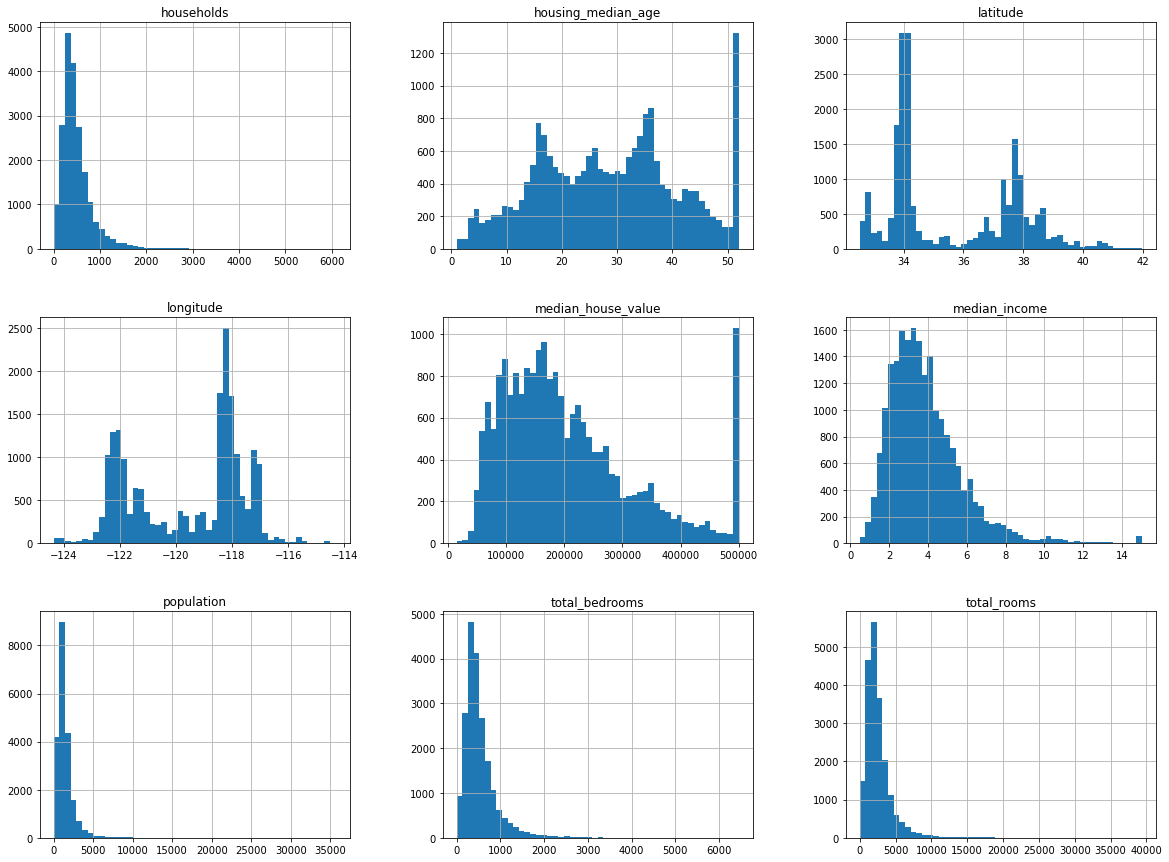

In [11]:
#visualisation des différents attributs par histogramme
dataset.hist(bins=50, figsize=(20,15))
plt.savefig("histogram_plots.png")
plt.show()



On obtient pour chaque variable de notre dataset une répartition des fréquences.

**1.3 Répartition des données**

Définition des variables: la target y est median_house_value et les features, le reste des variables.

In [12]:
X = dataset.drop(['median_house_value'], axis=1)

#la target Y est la variable median_house_value 
y = dataset['median_house_value']
y=np.array(y)
y = y.reshape(20640,1)
print(X.shape)
print(y.shape)


(20640, 9)
(20640, 1)


On fractionne nos données en base d'apprentissage (80% des données) et en base de test (20%).

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY


**1.4 Découverte et visualisation des données**

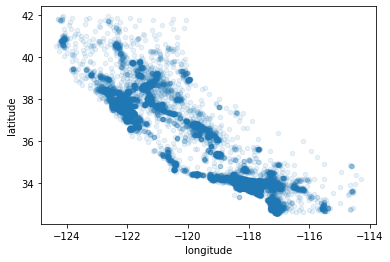

In [15]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

On obtient une localisation des logements en foction de la longitude et la latitude.

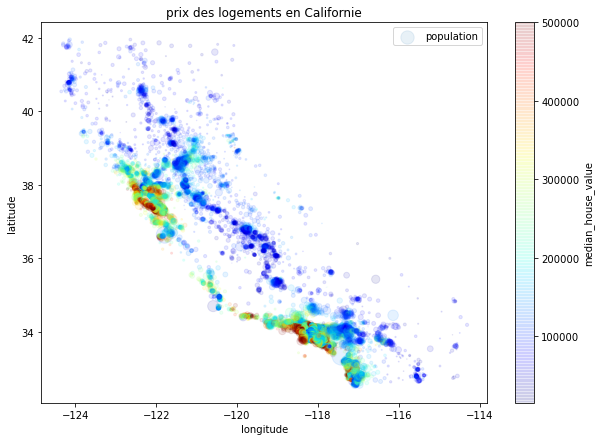

In [16]:
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
    s=dataset["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('prix des logements en Californie')
plt.legend()
plt.savefig("housing_prices_scatterplot.png")

Chaque point représente la population en fonction du prix du logement défini par la couleur(c).
Plus on va vers le rouge et plus le prix du logement sera élévé. 

Pour les couleurs, on utilise la carte de couleurs prédéfinie (option cmap) appelée jet, 
qui va du bleu (valeurs faibles) au rouge (valeurs élevées).

**visualisation et positionnement du nuage de points précédent sur une carte de la Californie**

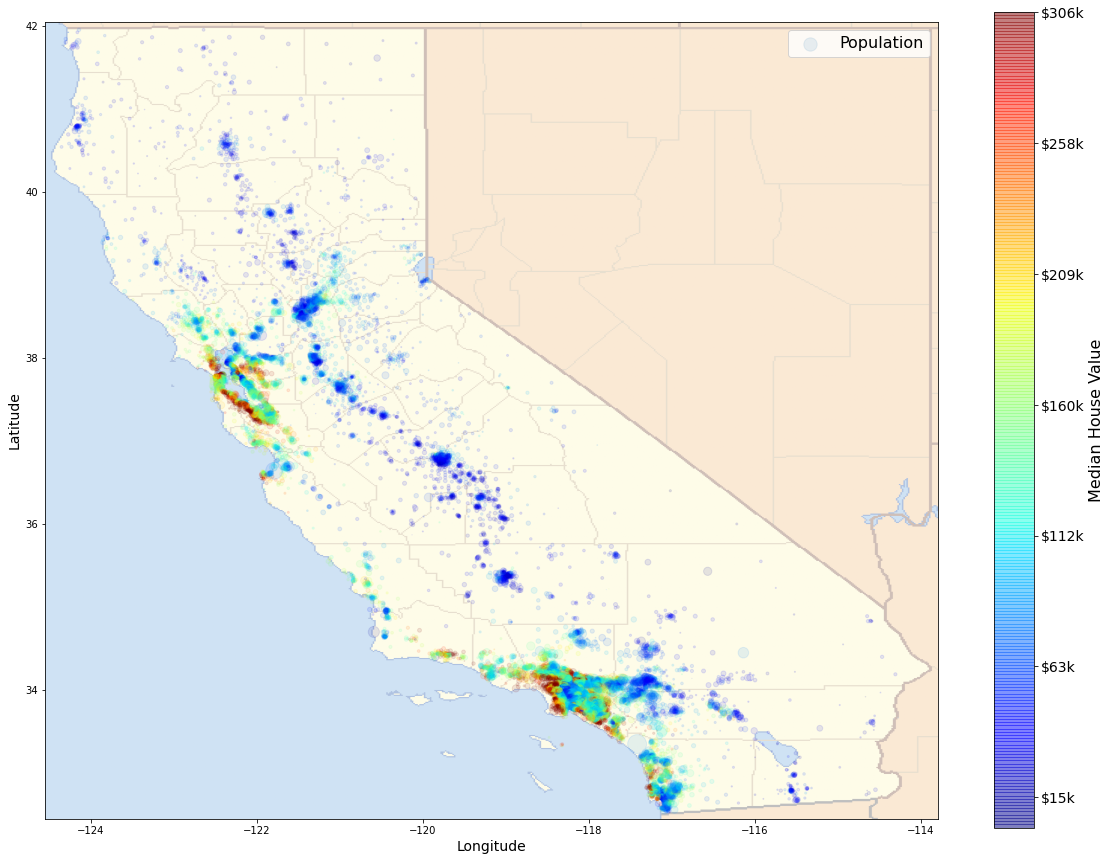

In [17]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = dataset.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,15),
                       s=dataset['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.1,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = dataset["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("california_housing_prices_plot.png")
plt.show()

La superposition de nos données sur la carte, nous permet de dire que le prix des logements en Californie
est plus élevé en zone côtière.

**Etude de la corrélation de la target en fonction des autres variables**

In [18]:
dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


On remarque d'après la matrice des corrélations que la variable qui est le plus corrélée avec la target,median_house_value
est la variable median_income.
Le revenu médian est donc un attribut important dans la détermination des prix médian des logements en Californie.

**1.5 Nettoyage des données**

Création des variables y (target) et x pour les features.

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


housing = train_set.drop('median_house_value', axis=1) # drop labels for training set
housing_labels = train_set['median_house_value'].copy()


La variable **total_bedrooms** contient des valeurs manquantes. on choisit la méthode qui consiste à remplacer ces 
valeurs manquantes par la valeur médiane.

In [20]:
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)]
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [60]:
dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].median())



dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  NEAR BAY            20640 non-null  int64  
 11  INLAND              20640 non-null  int64  
 12  <1H OCEAN           20640 non-null  int64  
 13  ISLAND              20640 non-null  int64  
 14  NEAR OCEAN          20640 non-null  int64  
 15  ocean_prox          20640 non-null  int32  
dtypes: f

La variable **ocean_proximity** est une variable qualitative. On va créer un tableau où chaque colonne correspondra 
à un attribut de la variable ocean_proximity. On attribuera la valeur 1 si l'attribut de la variable ocean_proximity 
correspond au libellé de la colonne crée. On obtient ainsi un tableau binaire des attributs de la variable 
qualitative ocean_preoximity.



In [22]:
dataset['NEAR BAY']=0
dataset['INLAND']=0
dataset['<1H OCEAN']=0
dataset['ISLAND']=0
dataset['NEAR OCEAN']=0
dataset



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,0,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,0,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,0,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,0,0,0,0


In [23]:


dataset.loc[dataset['ocean_proximity']=='NEAR BAY','NEAR BAY']=1
dataset.loc[dataset['ocean_proximity']=='INLAND','INLAND']=1
dataset.loc[dataset['ocean_proximity']=='<1H OCEAN','<1H OCEAN']=1
dataset.loc[dataset['ocean_proximity']=='ISLAND','ISLAND']=1
dataset.loc[dataset['ocean_proximity']=='NEAR OCEAN','NEAR OCEAN']=1
dataset



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


# 2 Sélection, apprentissage et évaluation du modèle


**Définition des variables: la target y est median_house_value et les features, le reste des variables.**

In [24]:


X = dataset.drop(['median_house_value'], axis=1)

#la target Y est la variable median_house_value 
y = dataset['median_house_value']
y=np.array(y)
y = y.reshape(20640,1)
print(X.shape)
print(y.shape)


(20640, 14)
(20640, 1)


On remplace les NAN de la colonne total_bedrooms par la valeur médiane de la distribution.

In [25]:
#on affiche la colonne de X -> total_bedrooms
#x = X['total_bedrooms']
#x = x.reshape(20640,1)

#print(x.shape)
# On remplace les "nan" par la moyenne des données de la colonne

#imptr = SimpleImputer(missing_values=np.nan, strategy='median')

#Adapter le model aux données 
#imptr.fit(x1)


#Adapter le model aux données transformer les nan en moyenne et les stocker dans X

#x1 = imptr.transform(x1)

#print(x1)






dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].median())


0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [26]:
dataset['total_bedrooms'].isnull().count

<bound method Series.count of 0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool>

In [27]:
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)]
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,1,0,0,0,0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,1,0,0,0,0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,1,0,0,0,0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,1,0,0,0,0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,1,0,0,0,0


Création d'une colonne 'ocean_prox' qui correspond à l'encodage de la variable qualitative ocean_proximity. 

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
quanti= LabelEncoder()
#Création d'une nouvelle colonne ocean_prox correspondant au code attribué à chaque attribut de ocean_proximity
dataset['ocean_prox']=quanti.fit_transform(dataset.ocean_proximity)
dataset



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN,ocean_prox
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1,0,0,0,0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0,0,0,0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,0,0,0,0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,0,0,0,0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0,1


On enlève de la matrice des variables explicatives la variable qualitative ocean_proximity car remplacée par ocean_prox
qui est numérique.

In [29]:
X = dataset.drop(['median_house_value', 'ocean_proximity'], axis=1)

#la target Y est la variable median_house_value 
y = dataset['median_house_value']
y=np.array(y)
y = y.reshape(20640,1)
print(X.shape)
print(y.shape)


(20640, 14)
(20640, 1)


In [30]:
dataset.fillna(dataset.median())
dataset



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN,ocean_prox
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1,0,0,0,0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0,0,0,0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,0,0,0,0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,0,0,0,0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0,1


**On fractionne nos données en base d'apprentissage (80% des données) et en base de test (20%).**


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Application de la régression linéaire sur les données d'apprentissage**

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Prediction des résultats du modèle sur l'ensemble du test**

In [33]:
y_pred = regressor.predict(X_train)
print(y_pred)
print(y_test)

[[188628.07724361]
 [290379.8948687 ]
 [250985.48476348]
 ...
 [194624.05524513]
 [281818.52422052]
 [271572.8418584 ]]
[[ 47700.]
 [ 45800.]
 [500001.]
 ...
 [500001.]
 [ 72300.]
 [151500.]]


**Evaluation de la performance du modèle gràce au MSE et Coefficient de détermination**

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse2 = mean_squared_error(y_train, y_pred)
print(mse2)
R2=regressor.score (X_train, y_train)
print(R2)

4683203783.504253
0.6496648627123223


On obtient une performance relativement moyenne du modèle avec un R² égal à 0.65. 

In [35]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_train,regressor.predict(X_train))))

68433.93736666226


**Modélisation gràce aux arbres de décision**

On construit un arbre de décision sur les données d'apprentissage

In [36]:
from sklearn.tree import DecisionTreeRegressor
model_decision = DecisionTreeRegressor(random_state=48)
model_decision.fit(X_train,y_train)






DecisionTreeRegressor(random_state=48)

In [37]:
y_pred = model_decision.predict(X_train)
from sklearn.metrics import r2_score
print("Performance du modèle sur les données d'apprentissage: {}".format(model_decision.score(X_train,y_train)))
print("MSE {}".format(np.sqrt(mean_squared_error(y_train,y_pred))))

Performance du modèle sur les données d'apprentissage: 1.0
MSE 0.0


Au vu des résultats, il est difficile de conclure que le modèle est parfait. On va donc utiliser la méthode du K-Fold
(validation croisée) pour s'assurer de la bonne performance du modèle.

In [38]:
validcross = cross_val_score(model_decision, X_train, y_train, cv=10)
validcross

array([0.67173794, 0.66718838, 0.65540746, 0.60153279, 0.64833537,
       0.65304377, 0.70098289, 0.62293137, 0.64797306, 0.656015  ])

La validation croisée nous donne 10 k-fold compris entre 0.6 et 0.7.

In [39]:
validcross.mean()



0.6525148013839528

La moyenne des K-fold est à 0.65

In [40]:
validcross.std()

0.02543095902529654

L'ecart-type des K-fold est de 0.025. On a donc une faible dispersion de valeurs.

**Validation croisée sur le modèlede régression**

In [41]:
validcrossreg = cross_val_score(regressor, X_train, y_train, cv=10)
validcrossreg

array([0.67879183, 0.63217854, 0.65223844, 0.64493131, 0.63888288,
       0.68265384, 0.66552723, 0.62771705, 0.60631577, 0.64556482])

In [42]:
validcrossreg.mean()

0.6474801707218906

In [43]:
validcrossreg.std()

0.022291819750186046

Pour le modèle de régression, on obtient des résultats légèrement différents avec des k-folds compris entre 0.6 et 
0.68. La moyenne est à 0.65 et un ecart type de 0.022. Les résultats sont quasi similaires sur les deux type de modèle.


Le modèle d'arbre de décision révèle un problème de surapprentissage. Ce problème peut être du au fait que l'arbre 
est trop complexe généralisant mal l'ensemble d'apprentissage ou que l'arbre soit mal équilibré accordant trop 
d'importance à une classe au détriment des autres. 

# 3 Fine-Tunning

**3.1 Grid Search**

Afin de résoudre le problème de surapprentissage notamment du modèle d'arbre de décision, nous allons jouer 
sur les différents paramètres du modèle pour pouvoir le rendre plus performant.
Dans un premier temps on va utiliser la fonction RandomForestRegressor,pour le modèle de régression de forêt 
aléatoire. Cette fonction permet de faire à la fois de la régression (pour les variables numériques) et de la 
classification (pour les variables catégorielles) gràce à plusieurs arbres de décision où chaque arbre de décision 
est formé sur un échantillon de données différent.
L'échantillonnage est effectué avec remplacement. 

Chaque arbre décisionnel est créé à partir de portions des données d'origine (entraînement) générées de manière 
aléatoire. Chaque arbre génère sa propre prévision et ses votes relatifs à un résultat. Le modèle de forêt tient 
compte des votes de tous les arbres décisionnels dans la prévision ou le classement du résultat d’un échantillon 
inconnu. Ceci est important en raison des problèmes de sur-ajustement à un modèle que peut rencontrer individuellement
chaque arbre. La combinaison de plusieurs arbres dans une forêt pour formuler des prévisions peut eventuellement règler
le problème de sur-ajustement associé à un seul arbre.





In [79]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


In [80]:

y=np.array(y)
y = y.reshape(20640,1)

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<ipython-input-80-811123086ca6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [81]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarni

In [82]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  48747.25989360713 
Standard Deviation: 1839.3125959426752


On obtient de meilleurs résultats avec la régression de forêt aléatoire avec un rmse moyen de presque 48747.

Afin d'optimiser notre modèle, on peut jouer sur les paramètres du modèle (Hyperparamètres). 
On peut faire varier manuellement ces hyperparamètres mais on peut le faire aussi de façon automatique gràce 
à la fonction GridSearchCV.
Pour un Random Forest, on doit choisir le nombre d’arbres à créer et le nombre de variables à utiliser à chaque 
division d’un noeud.
La méthode Grid search est une méthode d’optimisation (hyperparameter optimization) qui va nous permettre de tester 
une série de paramètres et de comparer les performances pour en déduire le meilleur paramétrage.
dans le cas d’un Random Forest on peut tester :
Par exemple:
    
    Nombre d’arbres : {100, 150, 200, 250}
    Nombre de variables sélectionnées : {8, 10, 12, 14, 16}

Le Grid Search croise simplement chacune de ces hypothèses et va créer un modèle pour chaque combinaison de 
paramètres. L'inconvénient d'une utilisation abusive du Grid Search augmente considérablement les temps de calcul.

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


Par rapport, à notre paramètrage, nous avons 3*4=12 combinaisons possibles.
on fait une validation croisée 5 fois.(cv=5)



In [84]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarni

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarni

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarni

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarni

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [85]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

On a une recherche pour 8 variables maximum et 30 estimations.

In [87]:
resultat = grid_search.cv_results_

print("{}\t\t {}\n".format('Mean Score','Parametres'))

for mean_score, params in zip(resultat["mean_test_score"], resultat["params"]):
    c = np.sqrt(-mean_score)
    d = params
    print("{:.2f}\t {}".format(c, d))

Mean Score		 Parametres

63342.49	 {'max_features': 2, 'n_estimators': 3}
55454.18	 {'max_features': 2, 'n_estimators': 10}
52236.24	 {'max_features': 2, 'n_estimators': 30}
60106.66	 {'max_features': 4, 'n_estimators': 3}
52771.13	 {'max_features': 4, 'n_estimators': 10}
50525.69	 {'max_features': 4, 'n_estimators': 30}
58665.01	 {'max_features': 6, 'n_estimators': 3}
52148.14	 {'max_features': 6, 'n_estimators': 10}
49799.03	 {'max_features': 6, 'n_estimators': 30}
58128.26	 {'max_features': 8, 'n_estimators': 3}
51533.12	 {'max_features': 8, 'n_estimators': 10}
49833.54	 {'max_features': 8, 'n_estimators': 30}
62085.98	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53720.58	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59472.40	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52138.19	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58864.29	 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51425.06	 {'bootstrap': False, '

**3.2 Evaluation sur la base de test**

In [125]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

#Remove the text attribute because median can only be calculated on numerical attributes
X = dataset.drop('ocean_proximity', axis=1)

imputer.fit(X)

# The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable.
imputer.statistics_



array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00])

In [126]:
X = imputer.transform(X)

In [127]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = dataset.drop(['median_house_value', 'ocean_proximity'], axis=1)

X = dataset.dropna

In [133]:
y = dataset['median_house_value']
y=np.array(y)
y = y.reshape(20640,1)
print(X.shape)
print(y.shape)

AttributeError: 'function' object has no attribute 'shape'

In [129]:
final_model = grid_search.best_estimator_
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


TypeError: Singleton array array(<bound method DataFrame.dropna of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  NEAR BAY  INLAND  <1H OCEAN  ISLAND  NEAR OCEAN  \
0            NEAR BAY         1       0          0       0           0   
1            NEAR BAY         1       0          0       0           0   
2            NEAR BAY         1       0          0       0           0   
3            NEAR BAY         1       0          0       0           0   
4            NEAR BAY         1       0          0       0           0   
...               ...       ...     ...        ...     ...         ...   
20635          INLAND         0       1          0       0           0   
20636          INLAND         0       1          0       0           0   
20637          INLAND         0       1          0       0           0   
20638          INLAND         0       1          0       0           0   
20639          INLAND         0       1          0       0           0   

       ocean_prox  
0               3  
1               3  
2               3  
3               3  
4               3  
...           ...  
20635           1  
20636           1  
20637           1  
20638           1  
20639           1  

[20640 rows x 16 columns]>, dtype=object) cannot be considered a valid collection.

In [130]:
print(X_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   
...          ...       ...                 ...          ...             ...   
15362    -117.22     33.36                16.0       3165.0           482.0   
16623    -120.83     35.36                28.0       4323.0           886.0   
18086    -122.05     37.31                25.0       4111.0           538.0   
2144     -119.76     36.77                36.0       2507.0           466.0   
3665     -118.37     34.22                17.0       1787.0           463.0   

       population  households  median_income  NEAR 